In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau,EarlyStopping, LambdaCallback, ModelCheckpoint
from keras.models import load_model

from ipynb.fs.full.DataLoader import DataLoader
from ipynb.fs.full.Models import CNN_Model

import seaborn as sns

### Parameters

In [2]:
samplesTrain = 100 #max : 5218 par ex 50 en normal et 50 en pneumonia à voir si intervalle random c'est mieux 
samplesVal = 18 #max : 18
samplesTest = 30 #max : 859

batch_size=64
model_architecture = 'custom'
percent=0.6
learning_rate=0.001
epochs = 10

In [3]:
data_loader = DataLoader(samplesTrain,
                         samplesVal,
                         samplesTest,
                         batch_size=batch_size,
                         augment_data=True,
                         shuffle=True)

############################################################################################
input\train/NORMAL
Processed image 1/100
Processed image 2/100
Processed image 3/100
Processed image 4/100
Processed image 5/100
Processed image 6/100
Processed image 7/100
Processed image 8/100
Processed image 9/100
Processed image 10/100
Processed image 11/100
Processed image 12/100
Processed image 13/100
Processed image 14/100
Processed image 15/100
Processed image 16/100
Processed image 17/100
Processed image 18/100
Processed image 19/100
Processed image 20/100
Processed image 21/100
Processed image 22/100
Processed image 23/100
Processed image 24/100
Processed image 25/100
Processed image 26/100
Processed image 27/100
Processed image 28/100
Processed image 29/100
Processed image 30/100
Processed image 31/100
Processed image 32/100
Processed image 33/100
Processed image 34/100
Processed image 35/100
Processed image 36/100
Processed image 37/100
Processed image 38/100
Processed image 39/100


In [4]:
train_data = data_loader.load_train_generator()
val_data   = data_loader.load_validation_generator()
test_data  = data_loader.load_test_generator()

### Create CNN model

### Load data

In [5]:
model = CNN_Model(chosenModel="custom",
                  percentTrain=percent).get_model()

In [6]:
#https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam
optimizer = Adam(
    learning_rate=learning_rate,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    name='Adam'
)

In [7]:
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=['accuracy'])

#### Callbacks
https://www.tensorflow.org/api_docs/python/tf/keras/callbacks

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ReduceLROnPlateau

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LambdaCallback utilisez ici pour liberez de l'espace !!

In [8]:
"""Reduce learning rate when a metric has stopped improving."""
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

In [9]:
"""Stop training when a monitored metric has stopped improving.
"""
early_stopping = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=15,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
)

In [10]:
"""Callback for creating simple, custom callbacks on-the-fly.

"""
lambda_callback =  LambdaCallback(on_epoch_end=lambda epoch, 
                                  logs: time.sleep(5), 
                                  on_batch_end=lambda batch,
                                  logs: time.sleep(20))

#### Train Model

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 32)     128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 224, 224, 32)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 224, 224, 32)      9248      
                                                        

In [12]:
train_X, train_y = train_data[0]
val_X, val_y = val_data[0]
test_X, test_y = test_data[0]

Augmentation des donnÃ©es


In [13]:
# https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit
# https://github.com/keras-team/keras/blob/v2.12.0/keras/engine/training.py#L1338-L1761
# https://faroit.com/keras-docs/1.2.0/models/model/
model_fit = model.fit(
        x = train_X, #images
        y = train_y, #labels
        batch_size=batch_size,
        epochs=epochs,
        verbose=2,
        callbacks=[reduce_lr, early_stopping, lambda_callback],
        validation_split=0.0,
        validation_data=(val_X, val_y),
#         shuffle=True,
#         class_weight=None,
#         sample_weight=None,
        initial_epoch=0,
        steps_per_epoch=len(train_X) // batch_size,
#         validation_steps=len(val_X),
#         validation_batch_size=None,
#         validation_freq=1,
#         max_queue_size=10,
#         workers=1,
#         use_multiprocessing=False,
    )      

Epoch 1/10
1/1 - 510s - loss: 1.0505 - accuracy: 0.3281 - val_loss: 1.4293 - val_accuracy: 0.0000e+00 - lr: 0.0010 - 510s/epoch - 510s/step
Epoch 2/10
1/1 - 287s - loss: 774.5650 - accuracy: 0.8889 - val_loss: 2.2255e-04 - val_accuracy: 1.0000 - lr: 0.0010 - 287s/epoch - 287s/step
Epoch 3/10
1/1 - 476s - loss: 689.4535 - accuracy: 0.8906 - val_loss: 1.1820e-12 - val_accuracy: 1.0000 - lr: 0.0010 - 476s/epoch - 476s/step
Epoch 4/10
1/1 - 335s - loss: 55.7320 - accuracy: 0.5833 - val_loss: 3.2338e-26 - val_accuracy: 1.0000 - lr: 0.0010 - 335s/epoch - 335s/step
Epoch 5/10
1/1 - 451s - loss: 32.2597 - accuracy: 0.7188 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - lr: 0.0010 - 451s/epoch - 451s/step
Epoch 6/10
1/1 - 327s - loss: 702.6329 - accuracy: 0.8333 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - lr: 0.0010 - 327s/epoch - 327s/step
Epoch 7/10
1/1 - 497s - loss: 232.9066 - accuracy: 0.8906 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - lr: 0.0010 - 497s/epoch - 497s/step
Epoch 8/10

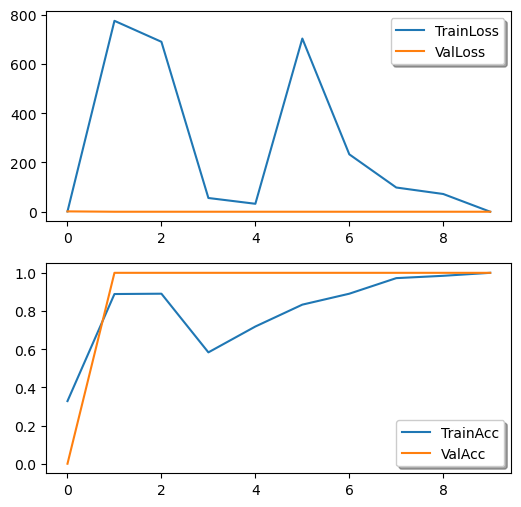

In [14]:
fig, ax = plt.subplots(2, 1, figsize=(6, 6))
ax[0].plot(model_fit.history['loss'], label="TrainLoss")
ax[0].plot(model_fit.history['val_loss'], label="ValLoss")
ax[0].legend(loc='best', shadow=True)

ax[1].plot(model_fit.history['accuracy'], label="TrainAcc")
ax[1].plot(model_fit.history['val_accuracy'], label="ValAcc")
ax[1].legend(loc='best', shadow=True)
plt.show()

### Evaluating Model on Test Data

In [15]:
test_score = model.evaluate(test_X, test_y, batch_size=64)

1/1 [==============================] - 1s 983ms/step - loss: 117.0366 - accuracy: 0.5000


In [16]:
print('\nModel Accuracy: ', test_score[1])


Model Accuracy:  0.5


### Matrix Confusion

In [17]:
predict_out = model.predict(test_X, batch_size=64)
test_predict = (predict_out > 0.5).astype(np.int8)

1/1 [==============================] - 1s 885ms/step


In [18]:
conf_matrix = confusion_matrix(y_true=data_loader.test_data[1], y_pred=test_predict)

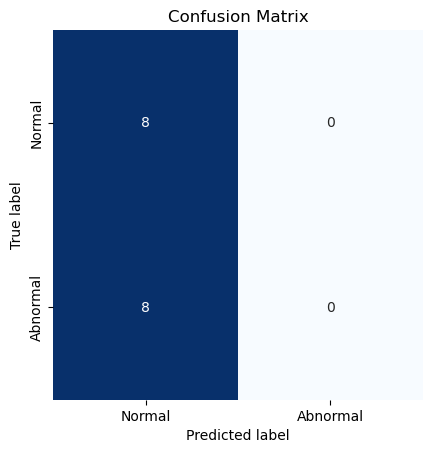

In [19]:
sns.heatmap(conf_matrix, annot=True, cmap='Blues', cbar=False, square=True, xticklabels=['Normal','Abnormal'], yticklabels=['Normal','Abnormal'])
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()